# Problem Statement

A model is to be created to classify the different species of the Iris flower.
Number of Instances: 150 (50 in each of three classes)
Number of Attributes: 4 numeric, predictive attributes and the class
Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

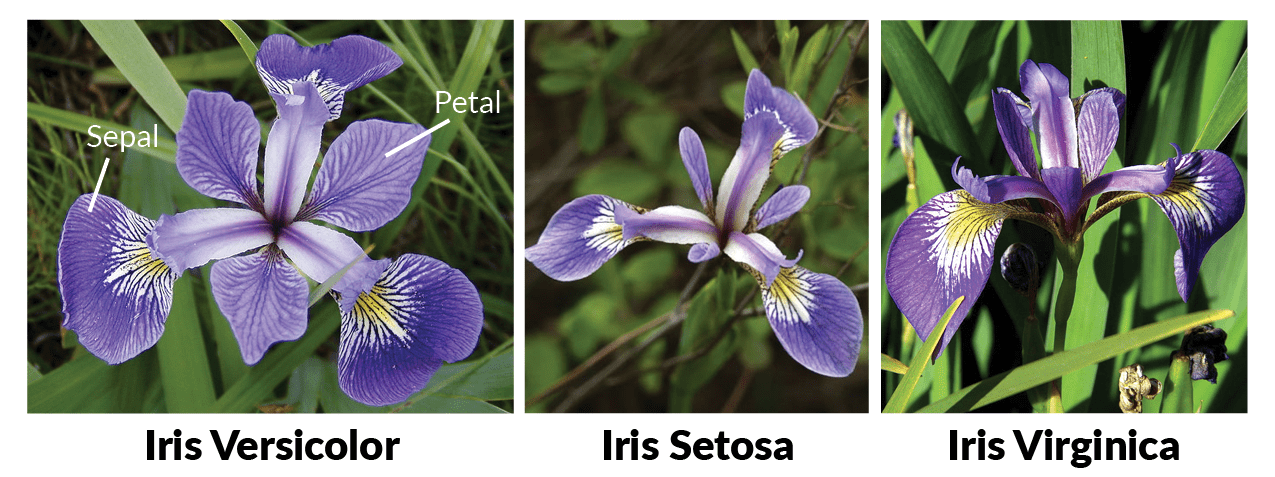

In [1]:
from IPython.display import Image
Image("image.png", width=1000, height=1000)

# DATA PREPROCESSING

## STEP 1:- Importing libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## STEP 2:- Importing dataset

In [3]:
dataset=pd.read_csv('iris.data', delimiter=',', header=None)
dataset.columns=list(['sepal_length','sepal_width','petal_length','petal_width','Class'])

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.info() # to watch if there is any missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Dataframe converted to array as working with arrays is easier
x=dataset.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y=dataset.iloc[:,4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## STEP 3:- Change the categorical Values to numeric values

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Therefore, indication of the different classes are as follows:-
    0-> Iris-setosa 
    1-> Iris-versicolor
    2-> Iris-virginica

## STEP 4:- Visualizing the dataset using seaborn, matplotlib and pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0A9164B48>,
      dtype=object)

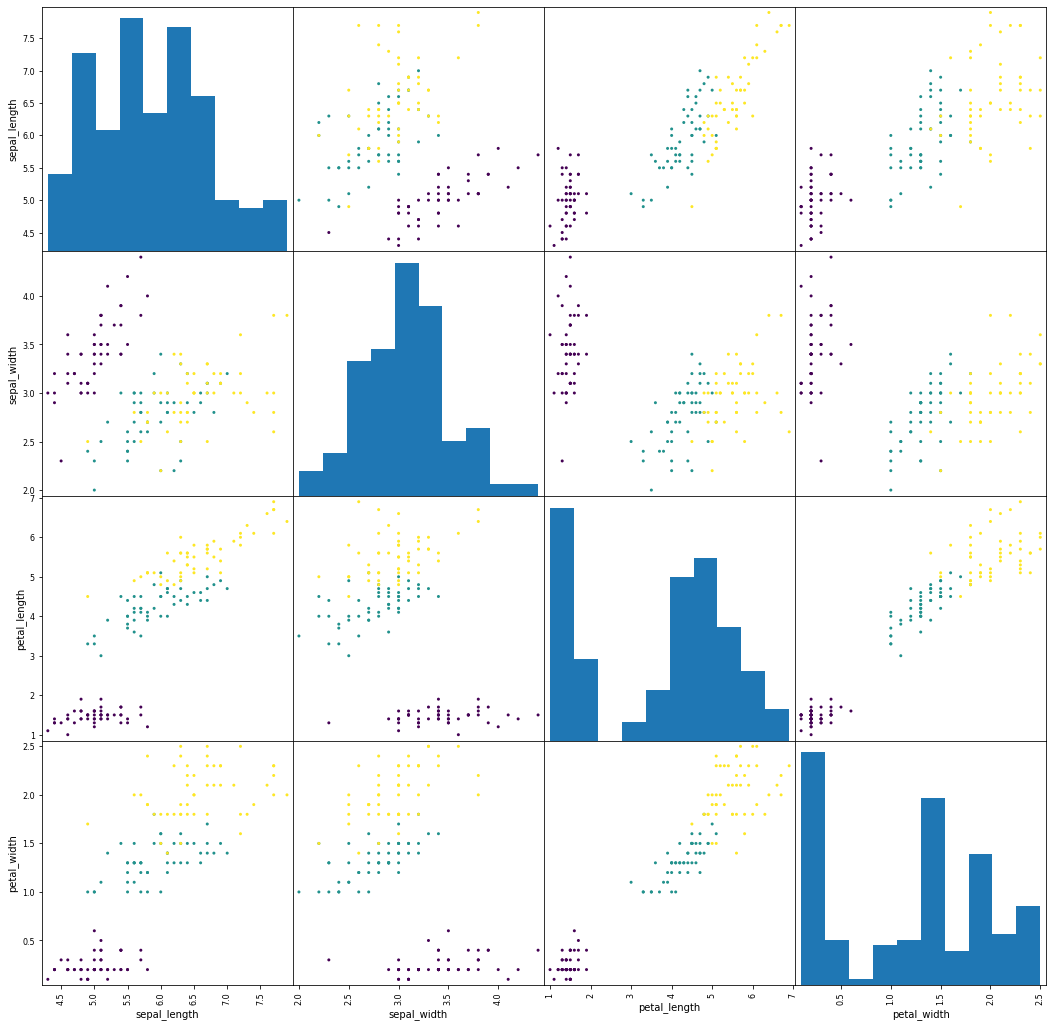

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['sepal_length','sepal_width','petal_length','petal_width']
scatter_matrix(dataset[attributes], figsize = (18,18), c=y, alpha=1)

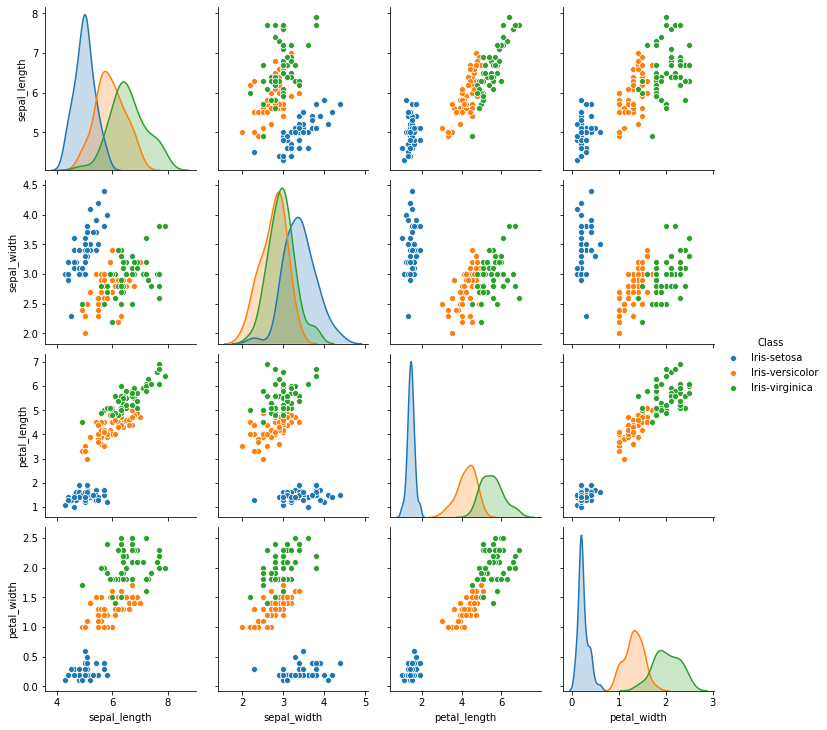

In [11]:
#the same thing could be visualized using seaborn more prominently
sns.pairplot(dataset, hue = 'Class', vars = ['sepal_length','sepal_width','petal_length','petal_width'] )

In [12]:
dataset['Class'].value_counts() #match with the chart below

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

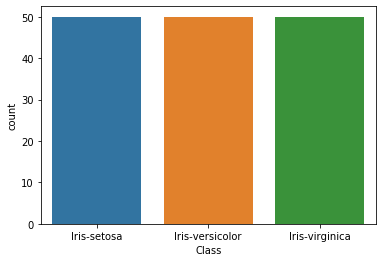

In [13]:
sns.countplot(dataset['Class'], label = "Count") 

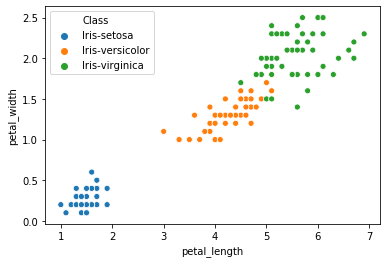

In [14]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'Class', data = dataset)

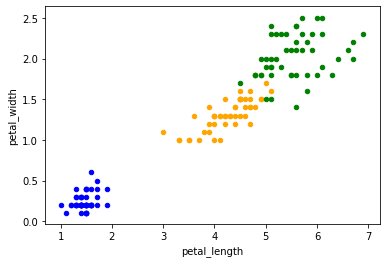

In [15]:
ax=dataset[y == 0].plot.scatter("petal_length", 'petal_width', color='blue', alpha=1) 
dataset[y == 1].plot.scatter("petal_length", 'petal_width',ax=ax, color='orange',alpha=1)
dataset[y == 2].plot.scatter("petal_length", 'petal_width',ax=ax, color='green',alpha=1)

## STEP 5:- Visualizing the correlation matrix

In [16]:
corr_matrix = dataset.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## STEP 6:- Splitting the dataset into training set and test set

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train.shape

(120, 4)

In [19]:
x_test.shape

(30, 4)

In [20]:
y_train.shape

(120,)

In [21]:
y_test.shape

(30,)

## STEP 7:- Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [23]:
x_train

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [24]:
x_test

array([[ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414],
       [-0.13307079,  1.67028869, -1.16259727, -1.17620281],
       [ 2.30486738, -1.02916778,  1.81915651,  1.48941263],
       [ 0.23261993, -0.35430366,  0.44296246,  0.42316645],
       [ 1.2077952 , -0.57925837,  0.61498672,  0.28988568],
       [-0.49876152,  0.77046987, -1.27728011, -1.04292204],
       [-0.2549677 , -0.35430366, -0.07311031,  0.15660491],
       [ 1.32969211,  0.09560575,  0.78701097,  1.48941263],
       [ 0.47641375, -1.9289866 ,  0.44296246,  0.42316645],
       [-0.01117388, -0.80421307,  0.09891395,  0.02332414],
       [ 0.84210448,  0.32056046,  0.78701097,  1.08957031],
       [-1.23014297, -0.12934896, -1.33462153, -1.44276436],
       [-0.37686461,  0.99542457, -1.39196294, -1.30948358],
       [-1.10824606,  0.09560575, -1.27728011, -1.44276436],
       [-0.86445224,  1.67028869, -1.27728011, -1.17620281],
       [ 0.59831066,  0.54551516,  0.5576453 ,  0.55644722],
       [ 0.84210448, -0.

# FIT THE CLASSIFIER TO THE TRAINING SET

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,n_jobs=-1)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# PREDICT THE TEST SET RESULTS

In [26]:
y_pred=classifier.predict(x_test)

In [27]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [28]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# EVALUATION OF MODEL'S PERFORMANCE

## Method 1:- Using Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [30]:
30/30

1.0

## Method 2:- Using Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Method 3:- Apply k-fold cross validation

In [32]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=x_train, y=y_train,cv=10)
accuracies

array([0.91666667, 1.        , 0.91666667, 1.        , 0.83333333,
       0.83333333, 1.        , 1.        , 1.        , 0.91666667])

In [33]:
accuracies.mean()

0.9416666666666667

## #CONCLUSION_1:-  Accuracy raw on train = 94.2%, on test = 100%, n_neighbors  = 5

# IMPROVING MODEL'S PERFORMANCE

In [34]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors': [5,8,10,12,11]}]
grid=GridSearchCV(estimator=classifier,param_grid=parameters, scoring='accuracy',cv=10)
grid=grid.fit(x_train,y_train)
best_accuracy=grid.best_score_
best_accuracy

0.9583333333333333

In [35]:
best_parameters=grid.best_params_
best_parameters

{'n_neighbors': 11}

# MODIFY THE MODEL AS PER THE PARAMETERS OBTAINED

In [36]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2,n_jobs=-1)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

In [37]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [38]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [40]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=x_train, y=y_train,cv=10)
accuracies

array([0.91666667, 1.        , 1.        , 1.        , 0.91666667,
       0.83333333, 1.        , 1.        , 1.        , 0.91666667])

In [41]:
accuracies.mean()

0.9583333333333333

## #CONCLUSION_2:- Accuracy raw on train = 95.8%, on test = 100%, n_neighbors = 11

# VISUALIZING THE DATASET RESULTS

But we have 4 features and it is very difficult to plot a 4 dimensional graph so it is required to reduce dimension using dimensionality reduction algorithms such as PCA or LDA as suitable.

## METHOD 1:- Dimensionality reduction using PCA

In [42]:
#Dimensionality reduction steps with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_1=pca.fit_transform(x_train)
x_test_1=pca.transform(x_test)

In [43]:
x_train_1.shape

(120, 2)

In [44]:
x_test_1.shape

(30, 2)

In [45]:
# Improve the model performance by checking out the best parameters
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,n_jobs=-1)
parameters=[{'n_neighbors': [7,9,8,10,11,12,13]}]
grid=GridSearchCV(estimator=classifier,param_grid=parameters, scoring='accuracy',cv=10)
grid=grid.fit(x_train_1,y_train)
best_accuracy=grid.best_score_
best_accuracy

0.9333333333333333

In [46]:
best_parameters=grid.best_params_
best_parameters

{'n_neighbors': 12}

In [47]:
# Modify the model with the best parameters obtained
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2,n_jobs=-1)
classifier.fit(x_train_1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='uniform')

In [48]:
# Predict the test set results
y_pred=classifier.predict(x_test_1)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [49]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [56]:
# Evaluate the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,classifier.predict(x_train_1))
cm

array([[40,  0,  0],
       [ 0, 37,  4],
       [ 0,  4, 35]], dtype=int64)

In [58]:
112/120

0.9333333333333333

In [57]:
# Evaluate the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  1, 10]], dtype=int64)

In [51]:
27/30

0.9

In [52]:
# Evaluate the performance using k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=x_train_1, y=y_train,cv=10)
accuracies

array([1.        , 1.        , 0.91666667, 1.        , 0.83333333,
       0.83333333, 0.91666667, 1.        , 1.        , 0.83333333])

In [53]:
accuracies.mean()

0.9333333333333333

In [54]:
# Evaluate the model using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## #CONCLUSION_3:- Accuracy on the test set emerged to be 90%, while accuracy on the training set emerged to be 93.33% using PCA dimensionality reduction, n-neighbors = 12

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


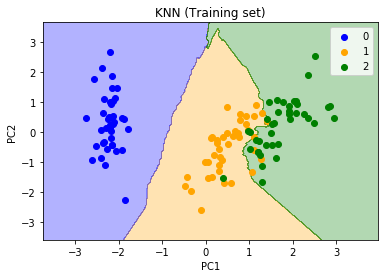

In [55]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_1, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue','orange', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


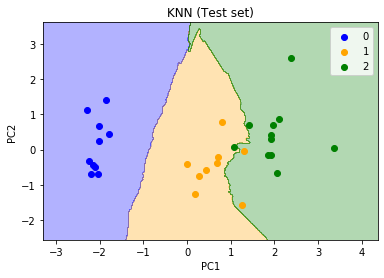

In [59]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_1, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## METHOD 2:- Dimensionality Reduction using LDA

In [60]:
#Dimensionality reduction steps with PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
x_train_2=lda.fit_transform(x_train,y_train)
x_test_2=lda.transform(x_test)

In [61]:
x_train_2.shape

(120, 2)

In [62]:
x_test_2.shape

(30, 2)

In [63]:
# Improve the model performance by checking out the best parameters
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,n_jobs=-1)
parameters=[{'n_neighbors': [7,9,8,10,11,12,13]}]
grid=GridSearchCV(estimator=classifier,param_grid=parameters, scoring='accuracy',cv=10)
grid=grid.fit(x_train_2,y_train)
best_accuracy=grid.best_score_
best_accuracy

0.975

In [64]:
best_parameters=grid.best_params_
best_parameters

{'n_neighbors': 12}

In [65]:
# Modify the model with the best parameters obtained
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2,n_jobs=-1)
classifier.fit(x_train_2,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='uniform')

In [66]:
# Predict the test set results
y_pred=classifier.predict(x_test_2)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [67]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [68]:
# Evaluate the performance using k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=x_train_2, y=y_train,cv=10)
accuracies

array([1.        , 1.        , 1.        , 1.        , 0.91666667,
       0.83333333, 1.        , 1.        , 1.        , 1.        ])

In [69]:
accuracies.mean()

0.975

In [70]:
# Evaluate the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,classifier.predict(x_train_2))
cm

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

In [71]:
117/120

0.975

In [72]:
# Evaluate the model using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [73]:
# Evaluate the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## #CONCLUSION_4:- Accuracy on the test set emerged to be 100%, while accuracy on the training set emerged to be 97.5% using LDA dimensionality reduction, n-neighbors = 12

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


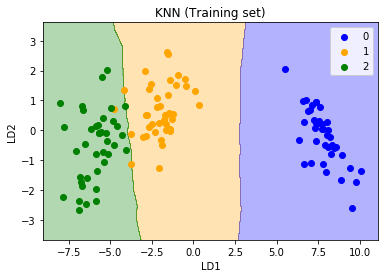

In [74]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue','orange', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


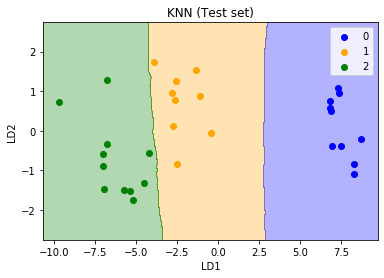

In [75]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_2, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## METHOD 3:-Dimensionality Reduction using Kernel PCA

In [76]:
#Dimensionality reduction steps with PCA
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2,kernel='rbf')
x_train_3=kpca.fit_transform(x_train,y_train)
x_test_3=kpca.transform(x_test)

In [77]:
x_train_3.shape

(120, 2)

In [78]:
x_test_3.shape

(30, 2)

In [79]:
# Improve the model performance by checking out the best parameters
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,n_jobs=-1)
parameters=[{'n_neighbors': [7,9,8,10,11,12,13]}]
grid=GridSearchCV(estimator=classifier,param_grid=parameters, scoring='accuracy',cv=10)
grid=grid.fit(x_train_3,y_train)
best_accuracy=grid.best_score_
best_accuracy

0.8083333333333333

In [80]:
best_parameters=grid.best_params_
best_parameters

{'n_neighbors': 10}

In [81]:
# Modify the model with the best parameters obtained
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2,n_jobs=-1)
classifier.fit(x_train_3,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

In [82]:
# Predict the test set results
y_pred=classifier.predict(x_test_3)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2,
       0, 1, 2, 2, 1, 2, 0, 0])

In [83]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [84]:
# Evaluate the performance using k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=x_train_3, y=y_train,cv=10)
accuracies

array([0.75      , 0.91666667, 0.75      , 0.83333333, 0.83333333,
       0.75      , 0.75      , 0.91666667, 0.75      , 0.83333333])

In [85]:
accuracies.mean()

0.8083333333333333

In [87]:
# Evaluate the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,classifier.predict(x_train_3))
cm

array([[40,  0,  0],
       [ 0, 37,  4],
       [ 0, 13, 26]], dtype=int64)

In [88]:
103/120

0.8583333333333333

In [89]:
# Evaluate the model using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



In [90]:
# Evaluate the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  3,  8]], dtype=int64)

In [91]:
27/30

0.9

## #CONCLUSION_5:- Accuracy on the test set emerged to be 90%, while accuracy on the training set emerged to be 80.833% using KernelPCA dimensionality reduction, n-neighbors = 10

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


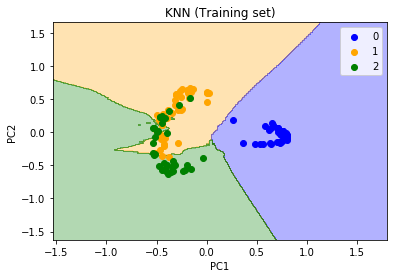

In [92]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_3, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue','orange', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


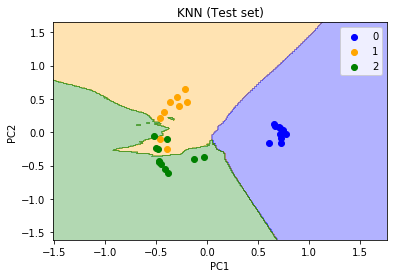

In [93]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_3, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# CONCLUSION:- Therefore for visualization LDA emerged to have the best dimensionality reduction. Training accuracy = 97.5%, test accuracy = 100%, n_neighbors = 12. Originally when it has to be put to work, n_neighbors=11, Training accuracy = 95.8%, Test accuracy = 100%